# Watershed hierarchies

Simple demonstration of how to compute hierarchies of watersheds.

Just some preliminary import and jupyter magic:

In [1]:
%%capture
!pip install higra

In [8]:
import numpy as np
import imageio
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import higra as hg

try:
    from utils import * # imshow, locate_resource, get_sed_model_file
except: # we are probably running from the cloud, try to fetch utils functions from URL
    import urllib.request as request; exec(request.urlopen('https://github.com/higra/Higra-Notebooks/raw/master/utils.py').read(), globals())

Our demonstration image:

Image size: (321, 481)


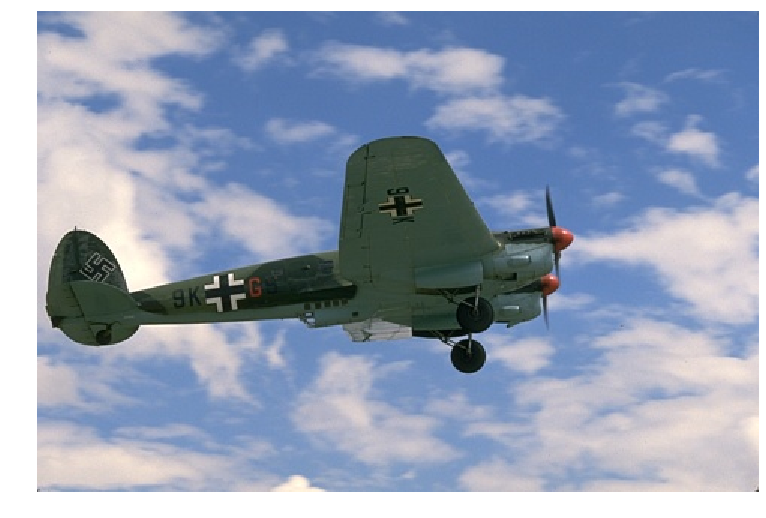

(<Figure size 721.5x481.5 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fa8c80a12e8>)

In [9]:
image = imageio.imread(locate_resource("3063.ppm"))
# switch to float to avoir numerical issue with uint8
image = image.astype(np.float32)/255 
# discard the color channel
size = image.shape[:2]
print("Image size:", size)
imshow(image)

Compute image gradient

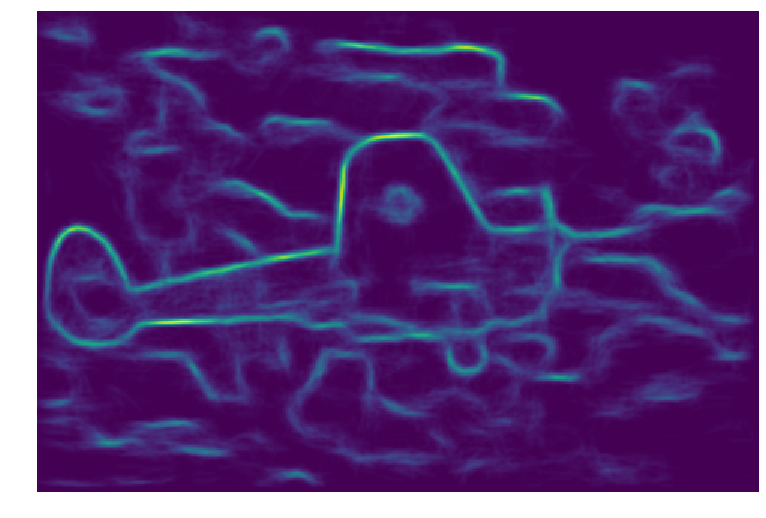

(<Figure size 721.5x481.5 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fa8c803d780>)

In [10]:
detector = cv2.ximgproc.createStructuredEdgeDetection(get_sed_model_file())
gradient_image = detector.detectEdges(image)

imshow(gradient_image)

Contruct an edge weighted graph, and transfer gradient to edge weights

In [11]:
graph = hg.get_4_adjacency_graph(size)
edge_weights = hg.weight_graph(graph, gradient_image, hg.WeightFunction.mean)

## Watershed hierarchy by area

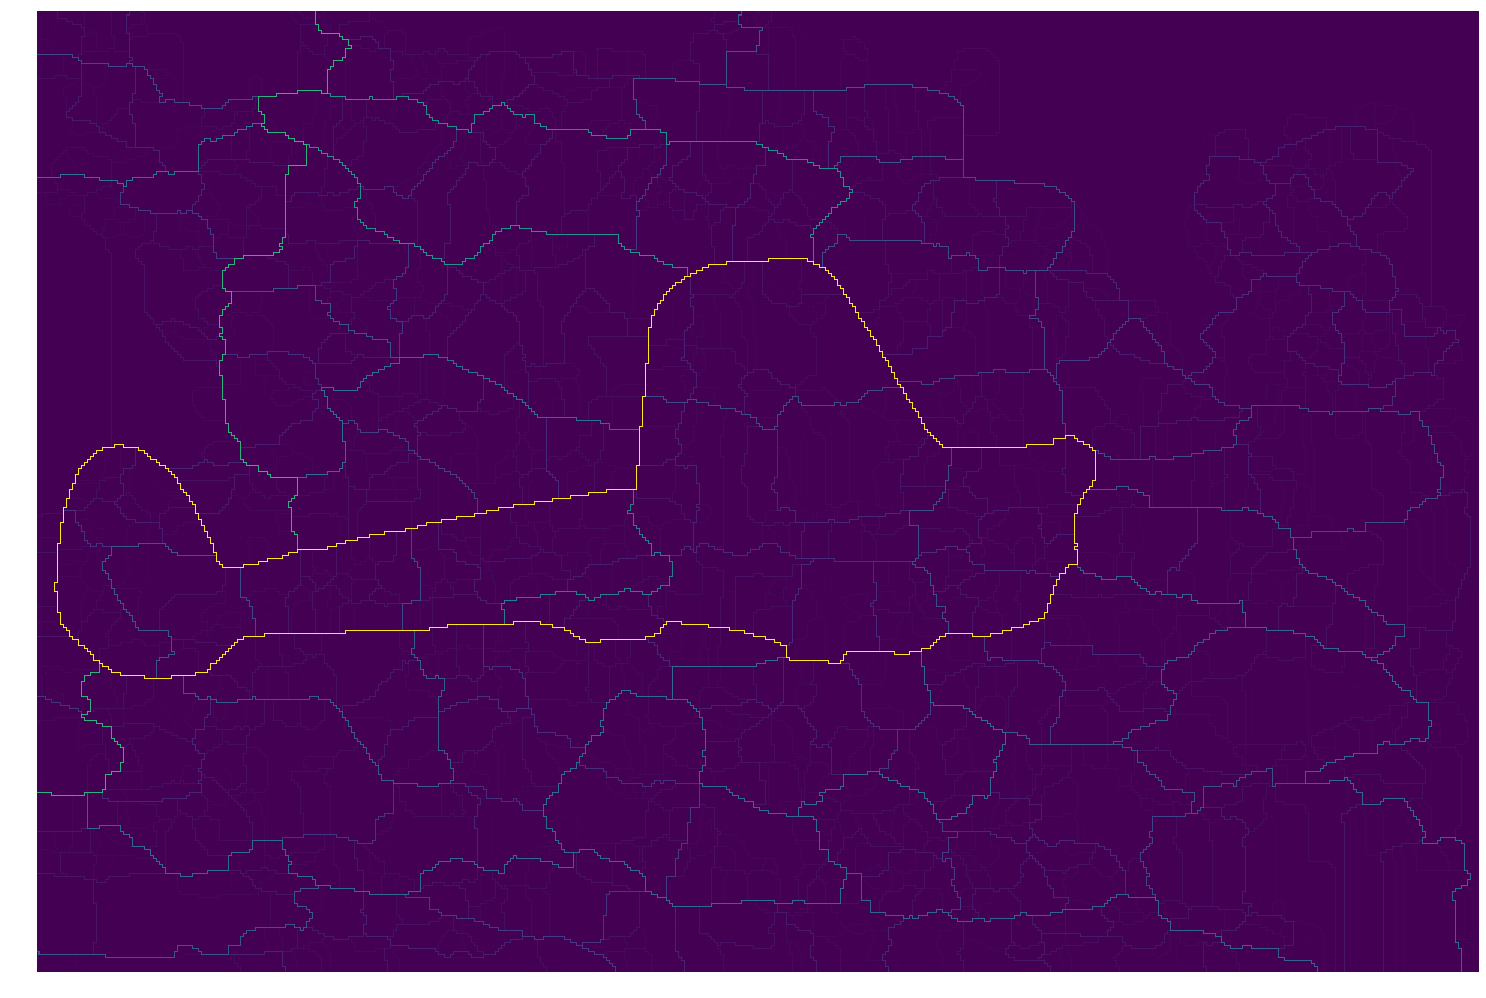

(<Figure size 1441.5x961.5 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fa8c800c4e0>)

In [12]:
tree, altitudes = hg.watershed_hierarchy_by_area(graph, edge_weights)
imshow(hg.graph_4_adjacency_2_khalimsky(graph, hg.saliency(tree, altitudes))**0.5)

## Watershed hierarchy by volume

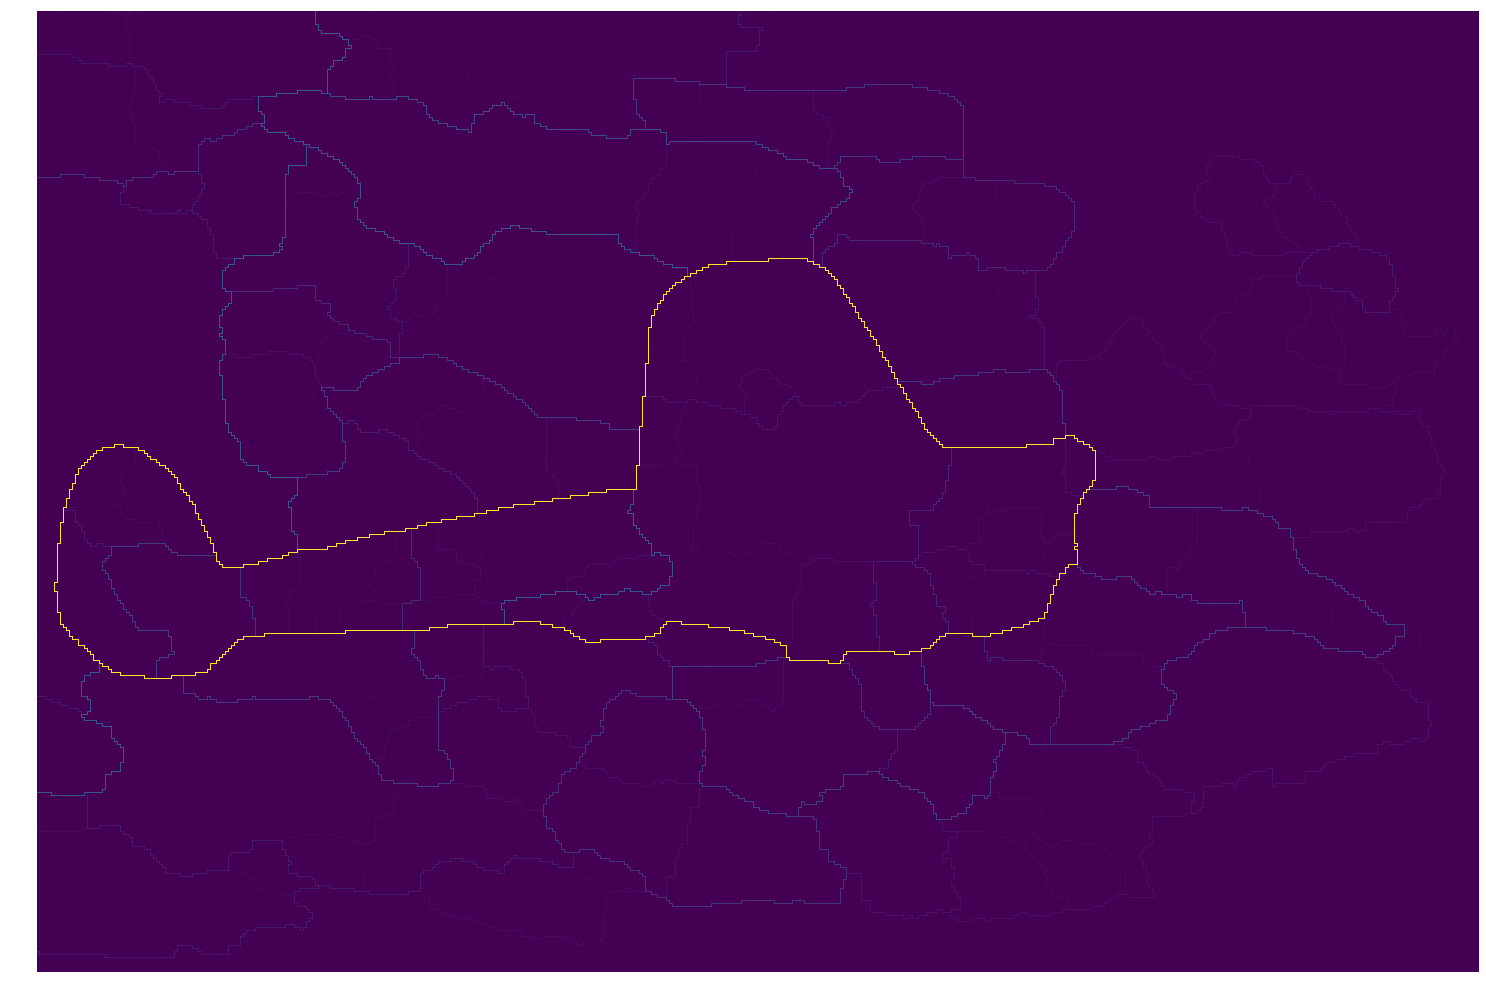

(<Figure size 1441.5x961.5 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fa8c7f65160>)

In [13]:
tree, altitudes = hg.watershed_hierarchy_by_volume(graph, edge_weights)
imshow(hg.graph_4_adjacency_2_khalimsky(graph, hg.saliency(tree, altitudes))**0.5)

## Watershed hierarchy by dynamics

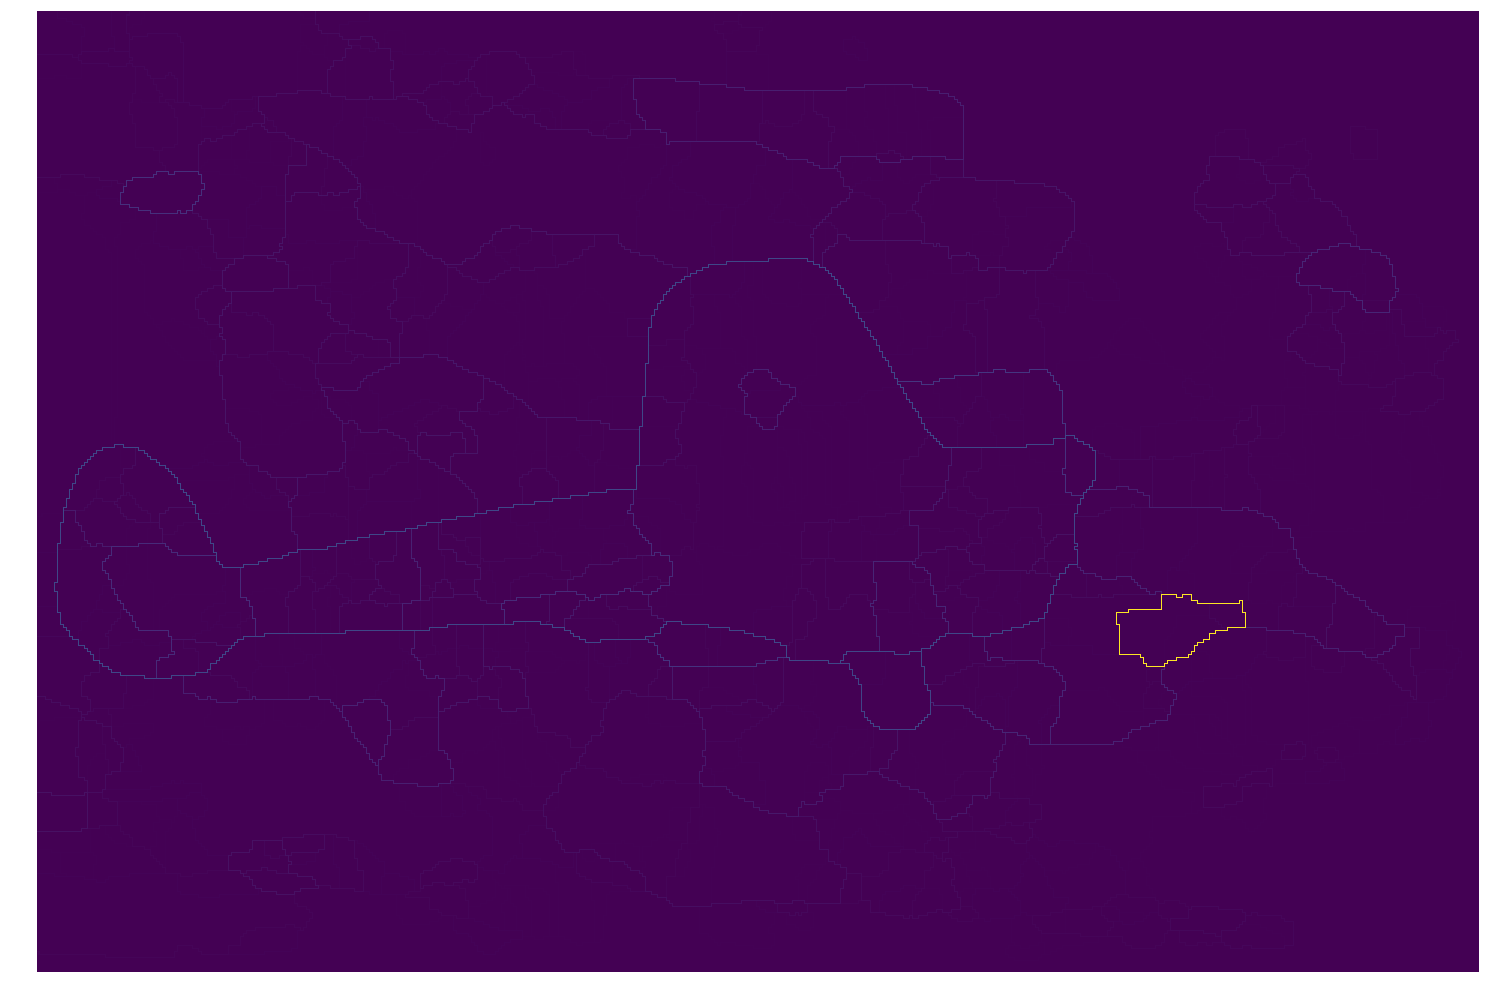

(<Figure size 1441.5x961.5 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fa8c7f37978>)

In [14]:
tree, altitudes = hg.watershed_hierarchy_by_dynamics(graph, edge_weights)
imshow(hg.graph_4_adjacency_2_khalimsky(graph, hg.saliency(tree, altitudes)))

## Watershed hierarchy by user provided attribute

The attribute used to computed the watershed hierarchy can be provided by an adapted functor, for example the watershed by area can be computed equivalently with:

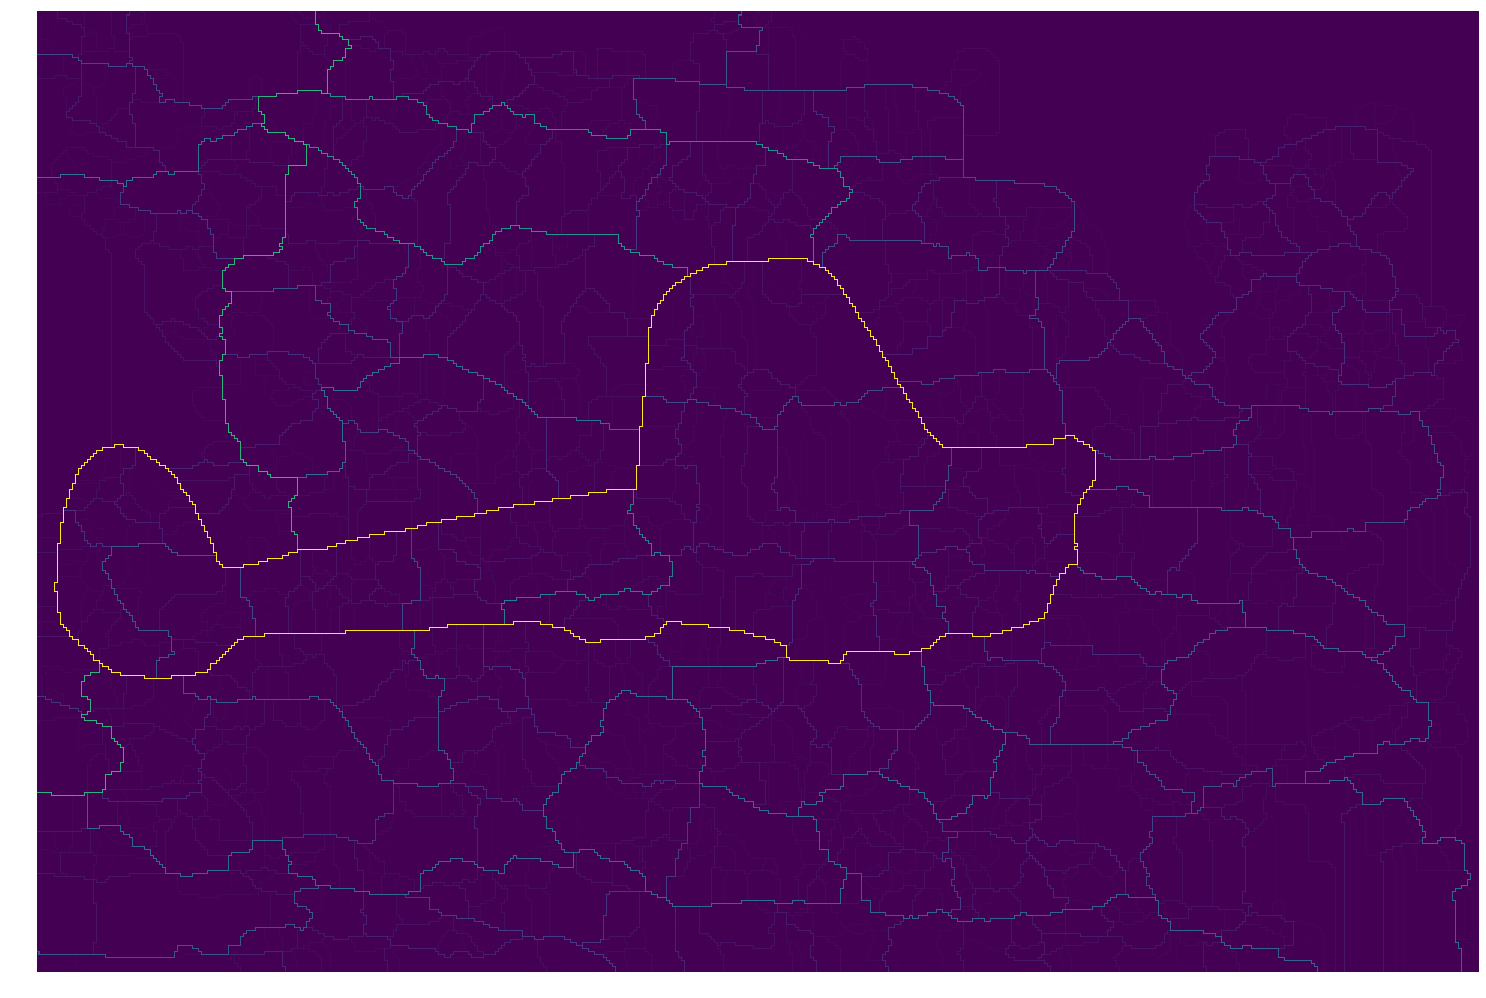

(<Figure size 1441.5x961.5 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fa8c4538a90>)

In [15]:
tree, altitudes = hg.watershed_hierarchy_by_attribute(graph, edge_weights, lambda tree, altitudes:hg.attribute_area(tree))
imshow(hg.graph_4_adjacency_2_khalimsky(graph, hg.saliency(tree, altitudes))**0.5)

In [16]:
help(hg.watershed_hierarchy_by_attribute)

Help on function watershed_hierarchy_by_attribute in module higra.hierarchy.watershed_hierarchy:

watershed_hierarchy_by_attribute(graph, edge_weights, attribute_functor)
    Watershed hierarchy by a user defined attributes.
    
    The definition of hierarchical watershed follows the one given in:
    
        J. Cousty, L. Najman.
        `Incremental algorithm for hierarchical minimum spanning forests and saliency of watershed cuts <https://hal-upec-upem.archives-ouvertes.fr/hal-00622505/document>`_.
        ISMM 2011: 272-283.
    
    The algorithm used is described in:
    
        Laurent Najman, Jean Cousty, Benjamin Perret.
        `Playing with Kruskal: Algorithms for Morphological Trees in Edge-Weighted Graphs <https://hal.archives-ouvertes.fr/file/index/docid/798621/filename/ismm2013-algo.pdf>`_.
        ISMM 2013: 135-146.
    
    The attribute functor is a function that takes a binary partition tree and an array of altitudes as argument
    and returns an array with the